In [29]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input,Flatten,Dense,Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

In [30]:
NUM_CLASSES = 10

In [31]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [32]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)

In [33]:
x_train[50,12,13,1]

0.18431373

In [34]:
input_layer = Input(shape=(32,32,3))
x = Flatten()(input_layer)
x = Dense(200,activation='relu')(x)
x = Dense(150,activation='relu')(x)
output_layer = Dense(NUM_CLASSES,activation='softmax')(x)
Model = Model(input_layer,output_layer)

In [35]:
Model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
opt = Adam(lr=0.0005)
Model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [37]:
Model.fit(x_train,y_train,batch_size=32,epochs=10,shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.8628 - accuracy: 0.3215
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6731 - accuracy: 0.3993
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6054 - accuracy: 0.4261
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5544 - accuracy: 0.4441
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5243 - accuracy: 0.4543
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4995 - accuracy: 0.4653
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4779 - accuracy: 0.4705
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4573 - accuracy: 0.4789
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4427 - accuracy: 0.4824
Epoch 10/10
1563/1563 [==============================] - 16s 10m

In [39]:
Model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4693 - accuracy: 0.4763


[1.4693156480789185, 0.4763000011444092]

In [41]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = Model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 3ms/step


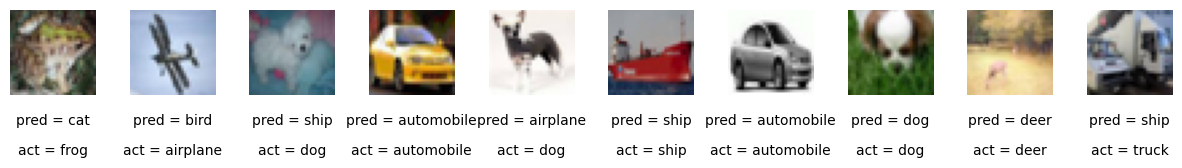

In [43]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)